In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("mediacompany.csv")
df.drop(["Unnamed: 7"], axis = 1, inplace = True)

In [3]:
df["Date"] = pd.to_datetime(df.Date).dt.date
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [4]:
from datetime import date

d0 = date(2017, 2, 28)
d1 = df.Date
delta = d1 - d0
df["day"] = delta
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [5]:
df["day"] = df.day.astype(str)
df["day"] = df.day.map(lambda x: x[0:2])
df["day"] = df.day.astype(int)

In [6]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


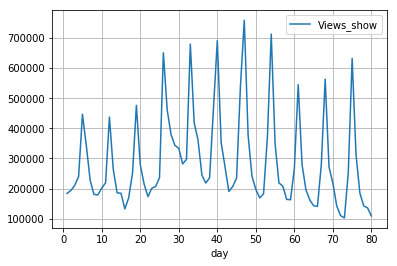

In [76]:
df.plot.line("day", "Views_show")
plt.grid()

In [14]:
X = df[["Visitors", "Character_A"]]
Y = df["Views_show"]

In [18]:
import statsmodels.api as am
X = sm.add_constant(X)
lm_1 = sm.OLS(Y,X).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.78e-08
Time:                        12:05:20   Log-Likelihood:                -1050.5
No. Observations:                  80   AIC:                             2107.
Df Residuals:                      77   BIC:                             2114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.795e+05   1.05e+05     -2.672      0.009   -4.88e+05   -7.12e+04
Visitors        0.3142      0.062      5.056      0.000       0.190       0.438
Character_A  9.475e+04   2.95e+04      3.213      0.002     3.6e+04    1.53e+05
==============================================================================
Omnibus:                        5.028   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.024
Skew:                           0.579   Prob(JB):                       0.0811
Kurtosis:                       2.595   Cond. No.                     1.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df["weekday"] = (df["day"]+3)%7
df.weekday.replace(0, 7, inplace = True)
df.weekday.astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [22]:
df.weekday.replace(2, 0, inplace = True)
df.weekday.replace(3, 0, inplace = True)
df.weekday.replace(4, 0, inplace = True)
df.weekday.replace(5, 0, inplace = True)
df.weekday.replace(6, 0, inplace = True)
df.weekday.replace(7, 1, inplace = True)

In [25]:
df.rename(columns={"weekday":"weekend"}, inplace=True)

In [26]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [30]:
X = df[["Visitors", "Character_A", "weekend"]]

X = sm.add_constant(X)
lm_2 = sm.OLS(Y, X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.53e-14
Time:                        12:35:57   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X = df[["Character_A", "weekend", "Ad_impression"]]

X = sm.add_constant(X)
lm_3 = sm.OLS(Y, X).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.05e-26
Time:                        12:40:50   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred = lm_3.predict(X)

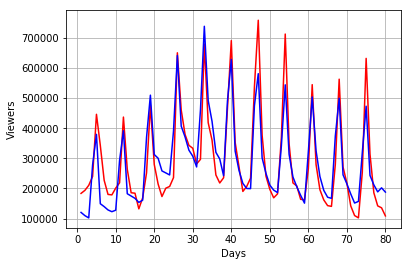

In [75]:
plt.plot(df.day, Y, color = "red", label = "Actual")
plt.plot(df.day, pred, color = "blue", label = "Predicted")
plt.xlabel("Days")
plt.ylabel("Viewers")
plt.grid()

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
model.score(X_test, Y_test)

0.8236350533008667

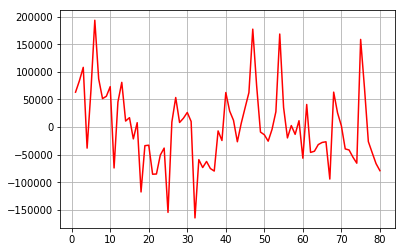

In [79]:
plt.plot(df.day, (Y-pred), color = "red", label = "Error")
plt.grid()